# Lab | Cleaning categorical data

----------------------------------------------------------------------------------------------------
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

-----------------------------------------------------------------------------------------------------

### Instructions

##### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

##### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
customer_df = pd.read_csv("C:\\Users\\mafal\\Documents\\ironhack\\labs\\lab-cleaning-categorical-data\\files_for_lab\\we_fn_use_c_marketing_customer_value_analysis.csv")

##### 3. What should we do with the customer_id column?

In [3]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# We'll drop colum customer_id as it is not important for our Customer Analysis Business Case.
customer_df = customer_df.drop('Customer', axis=1)

##### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables

In [5]:
numerical_df = customer_df.select_dtypes(include='number')
categorical_df = customer_df.select_dtypes(include='object')

In [6]:
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
categorical_df

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


##### 5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

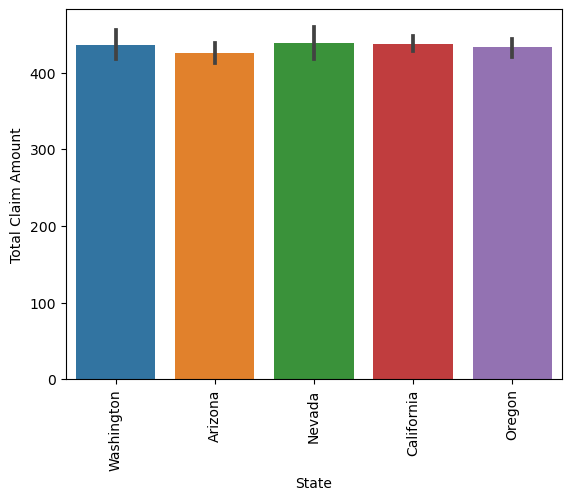

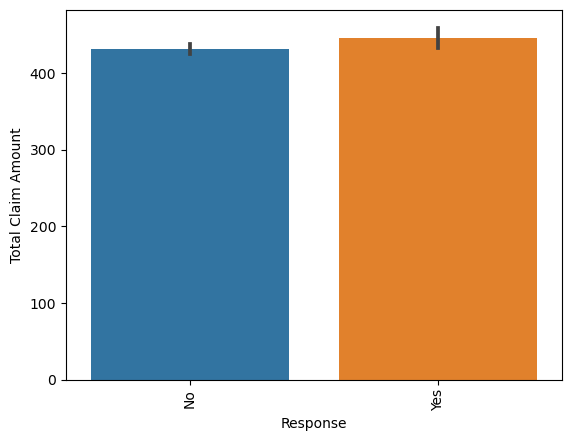

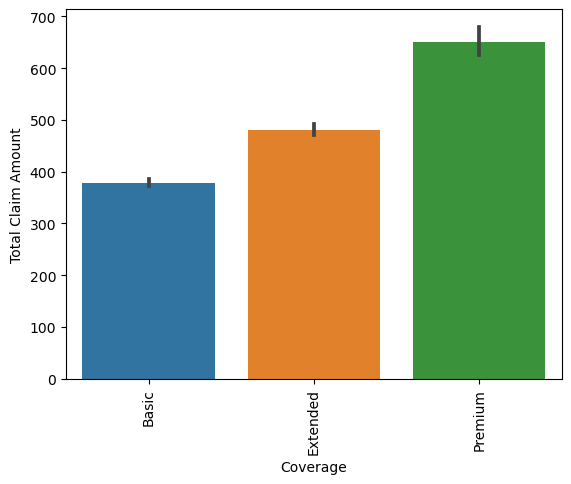

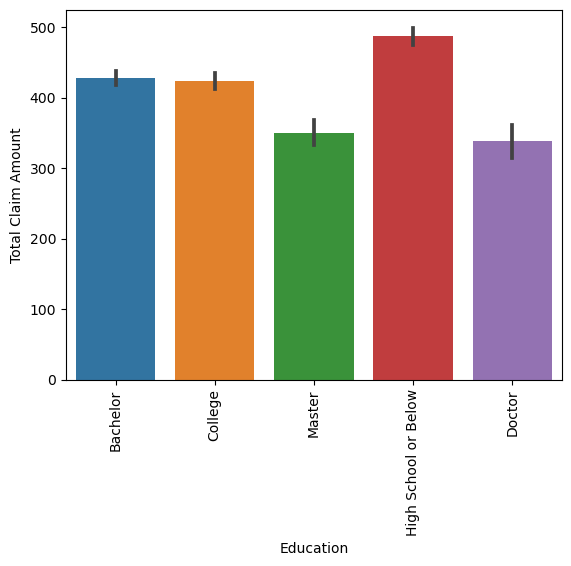

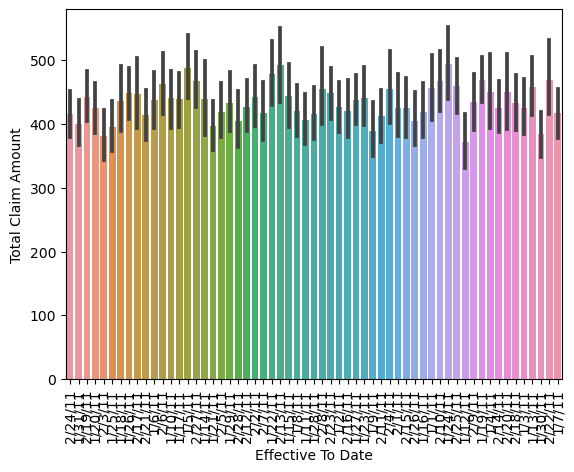

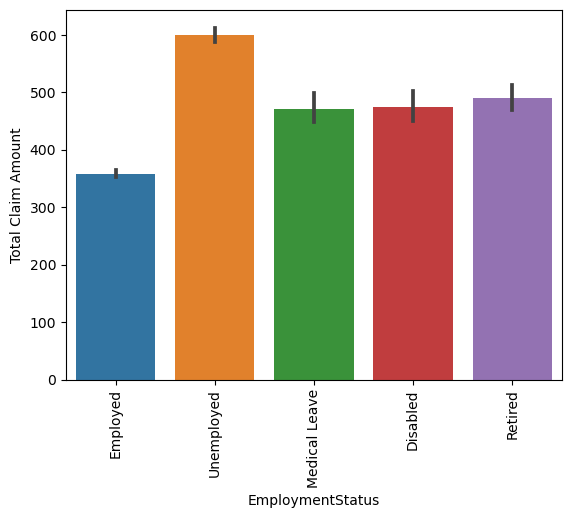

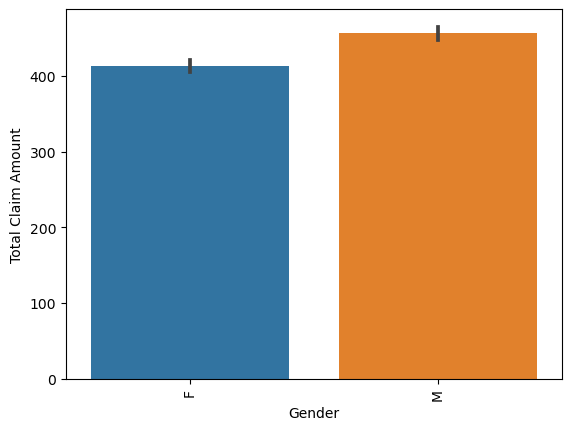

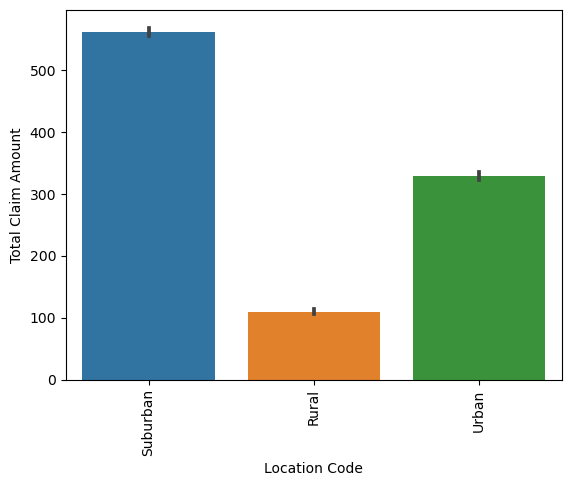

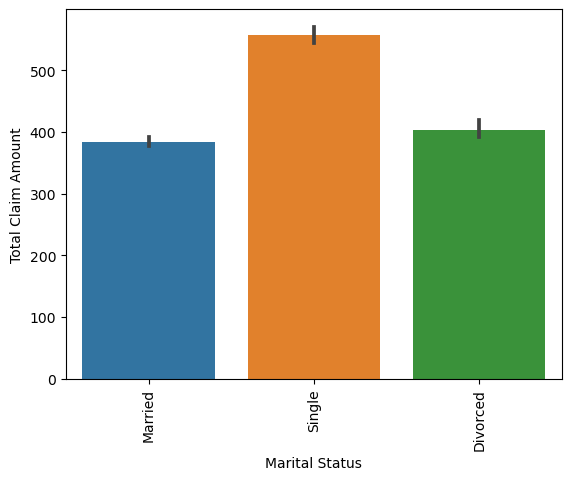

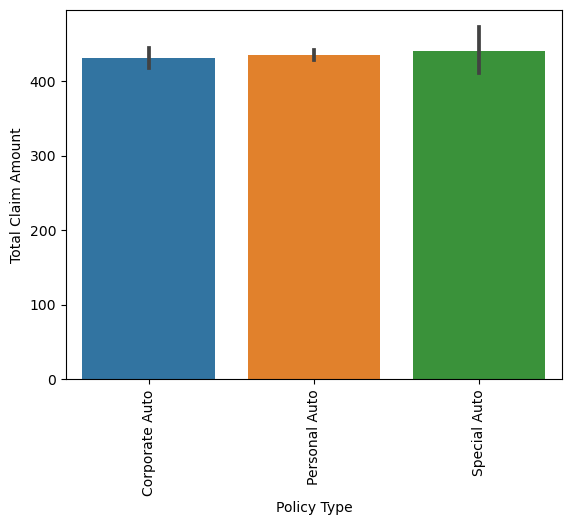

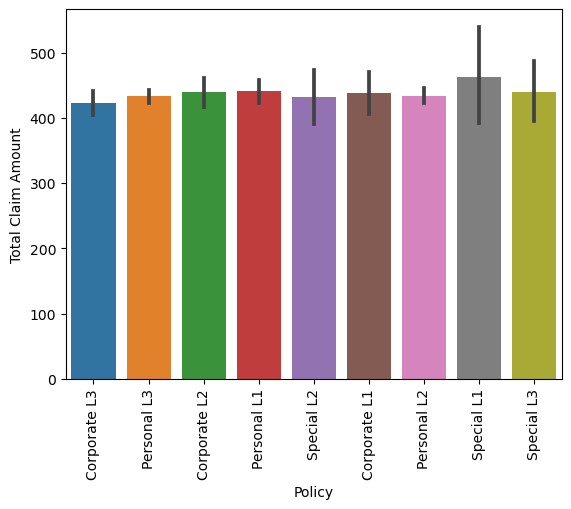

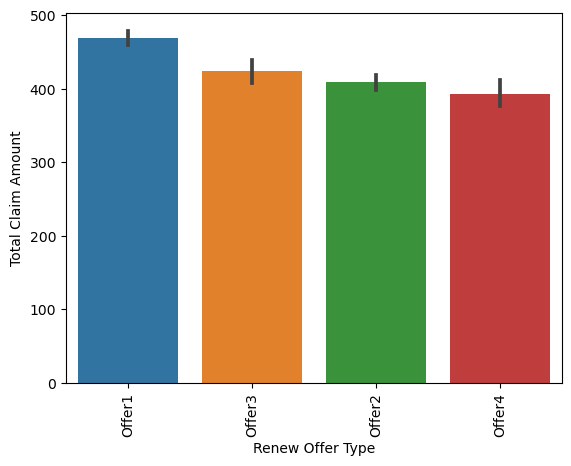

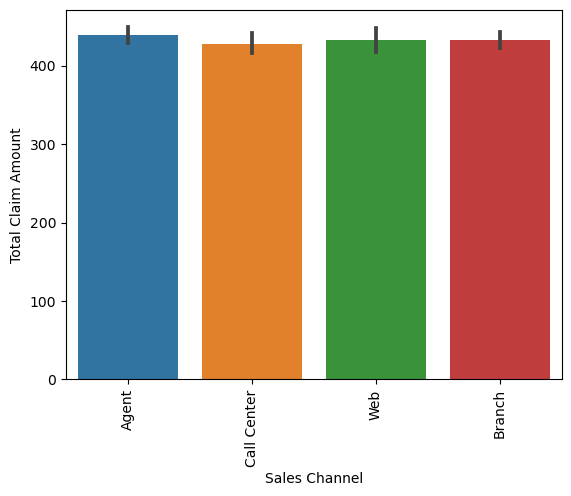

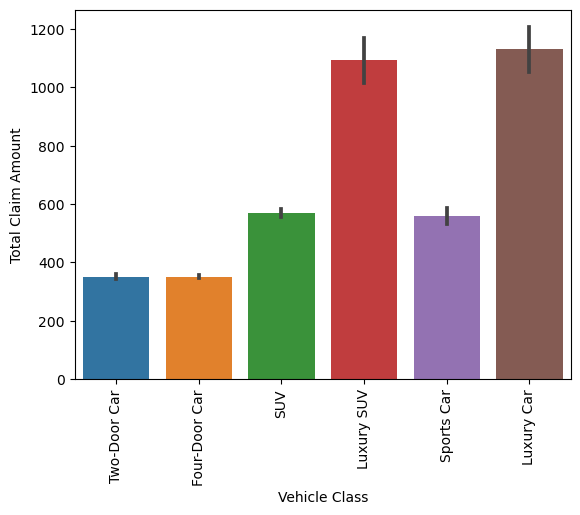

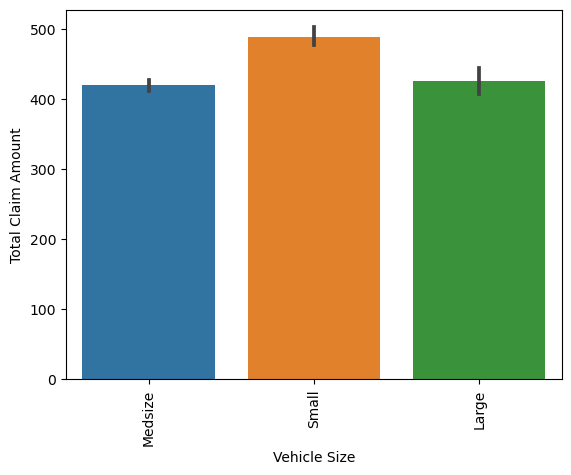

In [8]:
for col in categorical_df.columns:
  sns.barplot(x=categorical_df[col], y=customer_df["Total Claim Amount"])
  plt.xticks(rotation=90)
  plt.show()

-----------------------------------------------------------------------------------------------
In this plots there's a smaller discrepancy between the Total Claim Amount per State, for example, then count per state.

Same applies for Response, Policy Type, Policy, Renew Offer Type and Sales Channel.

We can also note, that even though there's a bigger count of Basic coverage and smaller count of Premium coverage. The Premium coverage is the one that hold the higher Total Claim Amount while the Basic holds the smaller amount.

------------------------------------------------------------------------------------------------------

##### 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [9]:
for col in categorical_df.columns:
    print(categorical_df[col].value_counts())
    print("/")

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
/
Response
No     7826
Yes    1308
Name: count, dtype: int64
/
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
/
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
/
Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    

-------------------------------------------------------------------------------------
The data seems to be clean already. What we can do more is:

    -> Rename the columns to a more standard pattern;
    
    -> Convert the Effective to Date column to Date type and crate a new column, effective_month, that includes only the month of the date
    
    ------------------------------------------------------------------------------

In [10]:
# Rename columns to snake case
customer_df = customer_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [11]:
# Rename columns to snake case
categorical_df = categorical_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [12]:
# effective_to_date column should be date, so we'll convert it from object to date type
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

In [13]:
# Create a new column containing only the month
categorical_df['effective_month'] = categorical_df['effective_to_date'].dt.month_name()

In [14]:
categorical_df['effective_month'].value_counts()

effective_month
January     4898
February    4236
Name: count, dtype: int64

In [15]:
# effective_to_date column should be date, so we'll convert it from object to date type
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Create a new column containing only the month
customer_df['effective_month'] = customer_df['effective_to_date'].dt.month_name()

customer_df['effective_month'].value_counts()

effective_month
January     4898
February    4236
Name: count, dtype: int64

# Lab | Feature extraction

------------------------------------------------------------------------------------------------
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

-----------------------------------------------------------------------------------------

##### 1. Open the categoricals variable we created before.

In [16]:
categoricals = categorical_df
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,February
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,January
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,February
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,January
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,February


##### 2. Plot all the categorical variables with the proper plot. What can you see?

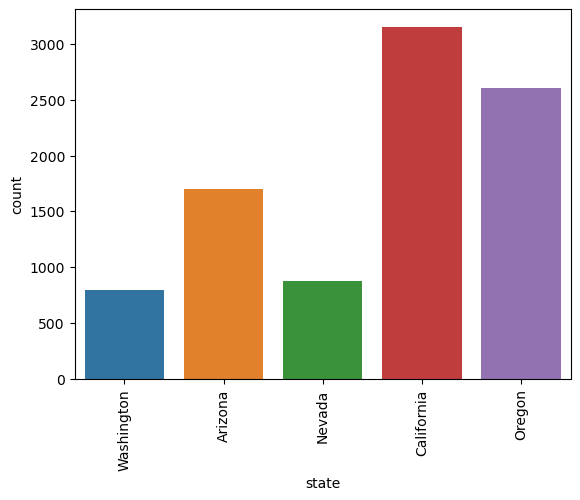

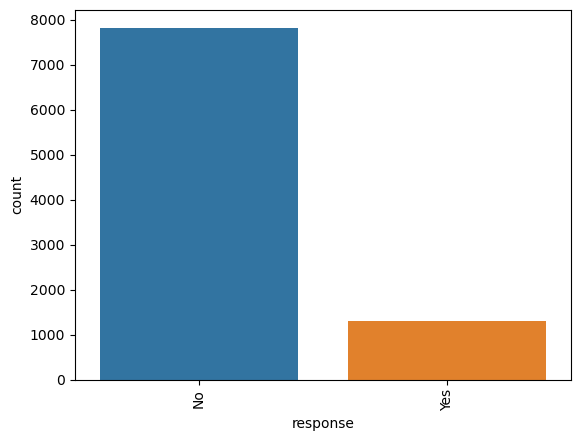

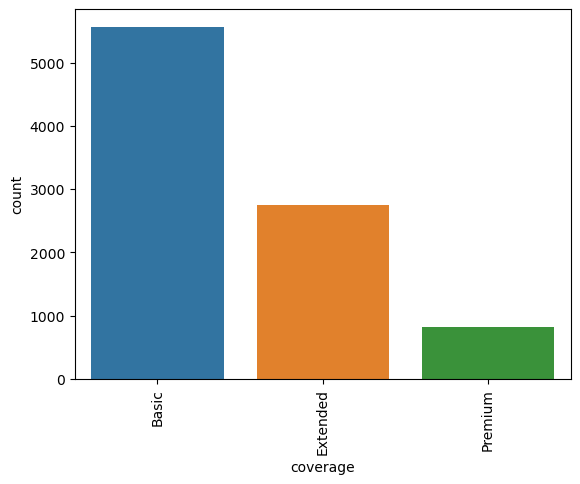

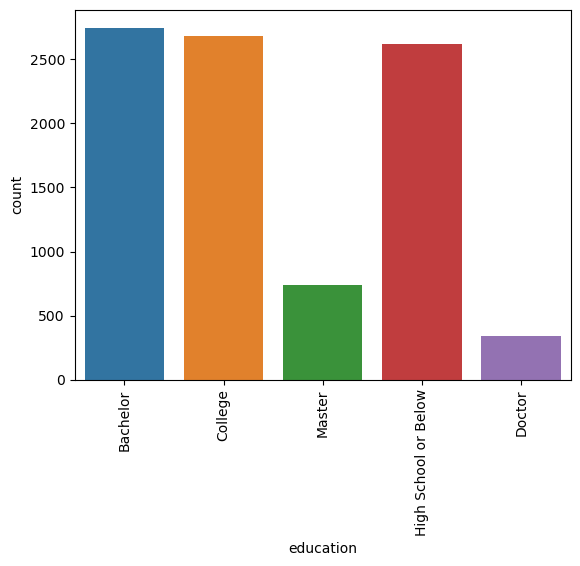

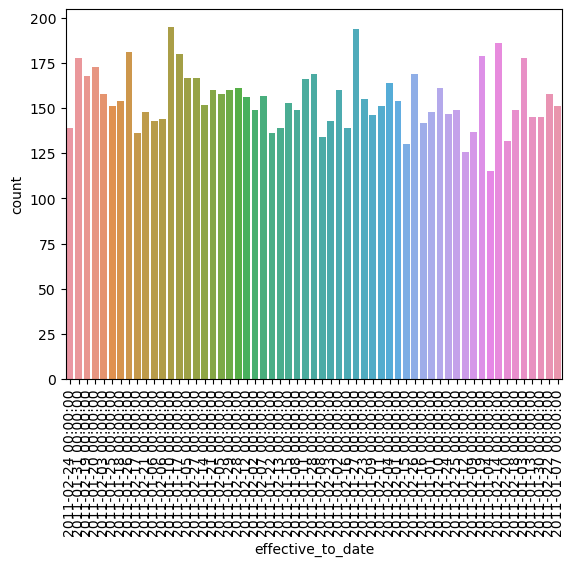

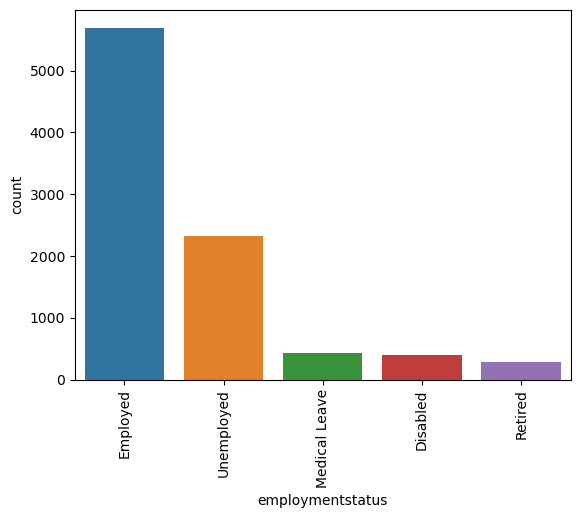

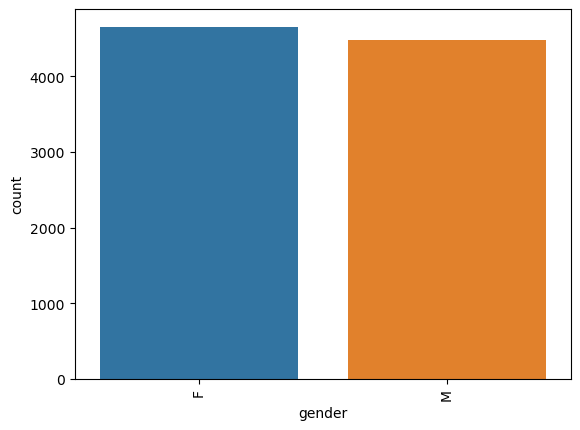

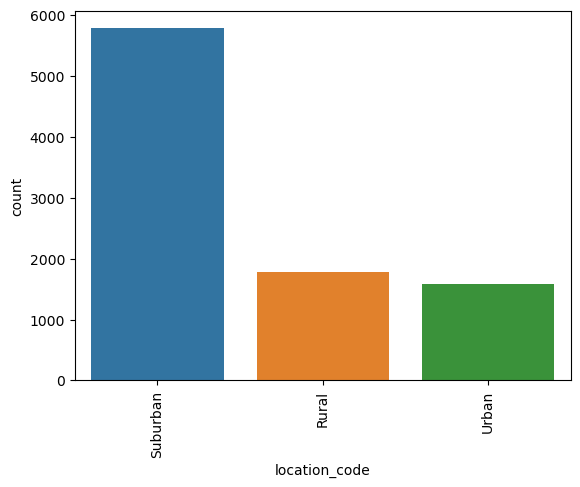

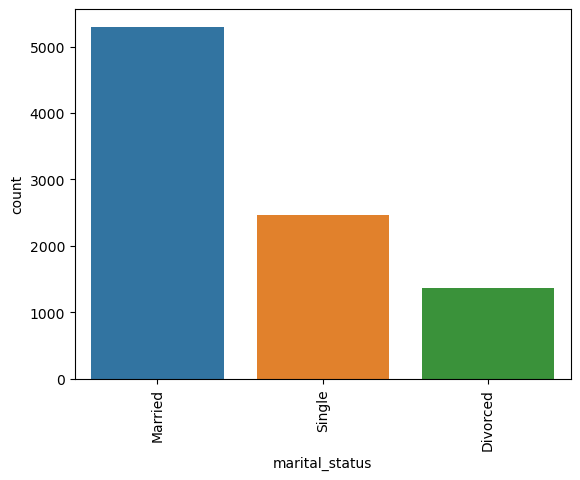

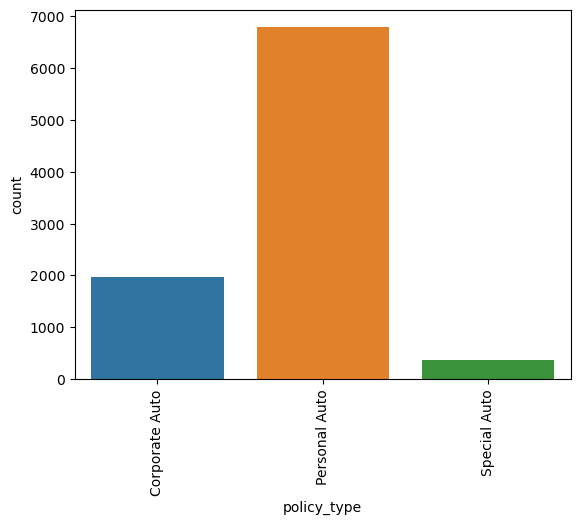

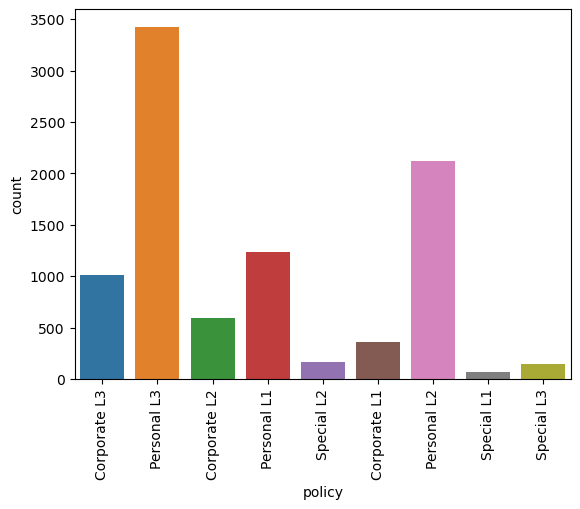

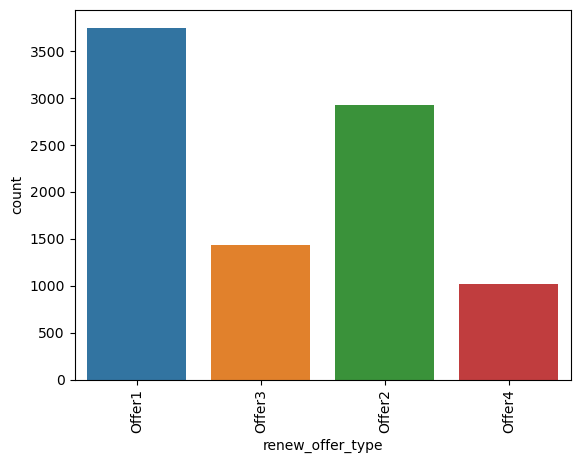

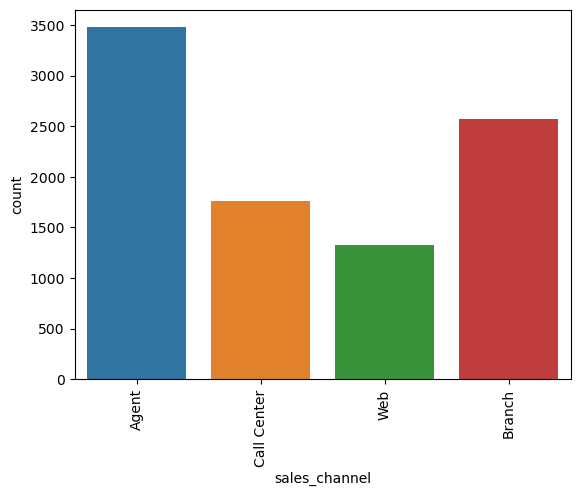

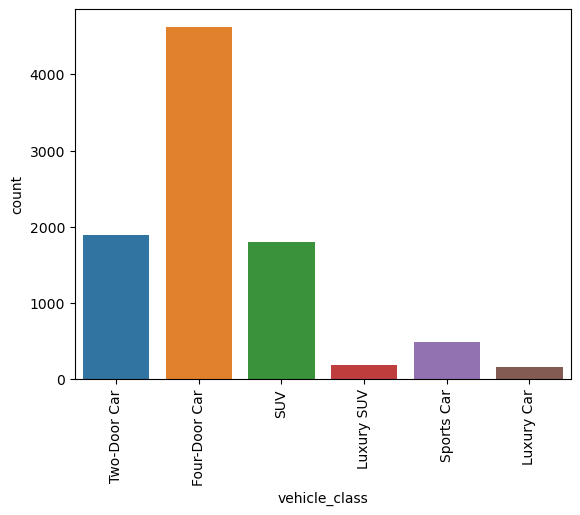

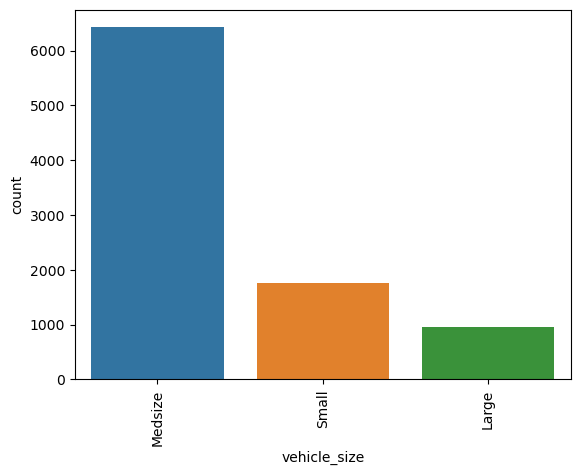

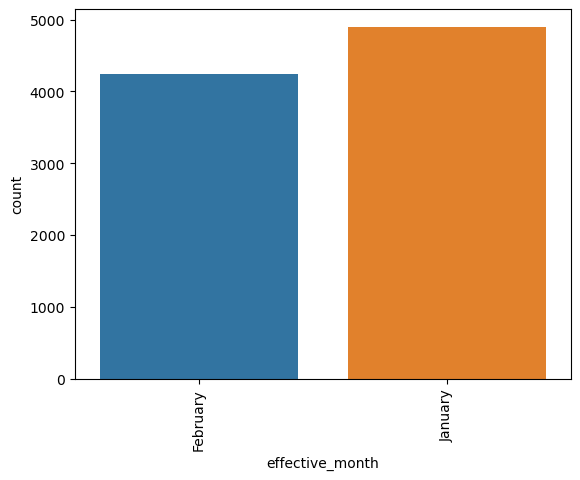

In [17]:
for col in categoricals.columns:
  sns.countplot(x=customer_df[col])
  plt.xticks(rotation=90)
  plt.show()

-------------------------------------------------------------------------------------------------
All categorical columns seem to be properly clean.

-------------------------------------------------------------------------------------------------

##### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

-----------------------------------------------------------------------------------------------------
The column Policy is redundant since we already have column policy_type (Corporate, Personal and Special).

Instead we could have a column policy_level (L1, L2 and L3)

---------------------------------------------------------------------------------------------------

In [19]:
# Remove the policy _type from policy and rename the latter to policy_level

# Remove the first word and leading space
categoricals['policy'] = categoricals['policy'].str.replace(r'^\w+\s', '', regex = True)
categoricals['policy'].value_counts()

# Renaming column policy to policy_level
categoricals = categoricals.rename(columns={'policy': 'policy_level'})

categoricals['policy_level'].value_counts()

policy_level
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

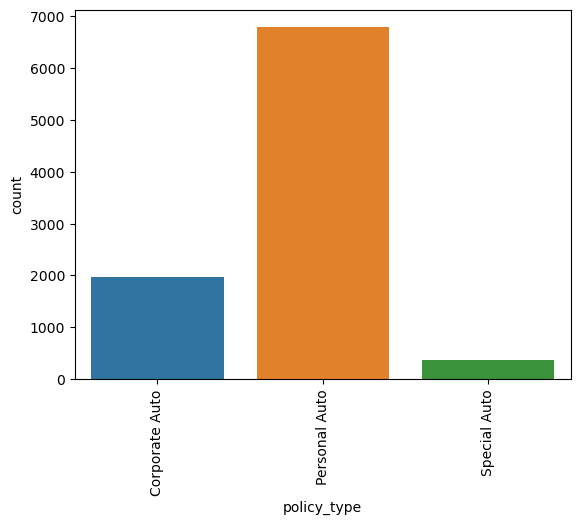

In [23]:
sns.countplot(x=categoricals['policy_type'])
plt.xticks(rotation=90)
plt.show()

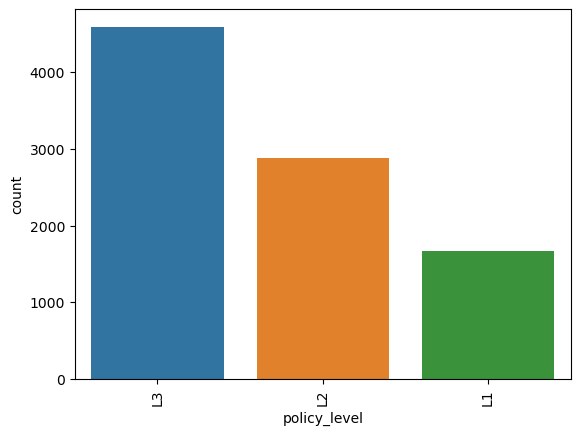

In [22]:
sns.countplot(x=categoricals['policy_level'])
plt.xticks(rotation=90)
plt.show()

##### 4. Plot time variable. Can you extract something from it?

------------------------------------------------------------------------------------------------
Our time variable should the effective_to_date column, or our new column effective_month.

------------------------------------------------------------------------------------------------

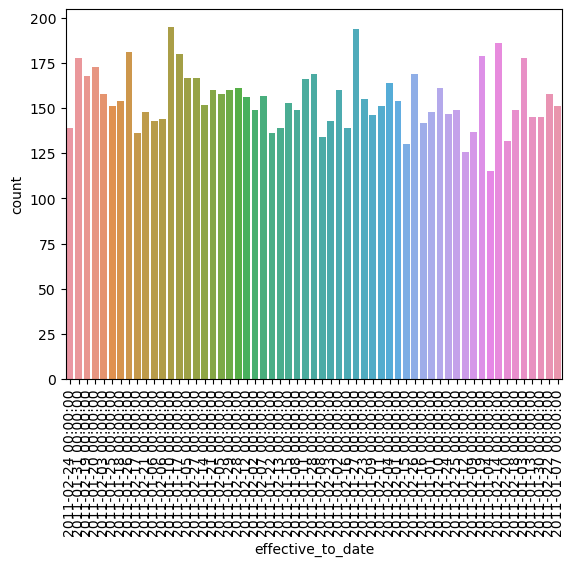

In [25]:
# Plotting effective_to_date column
sns.countplot(x=categoricals['effective_to_date'])
plt.xticks(rotation=90)
plt.show()

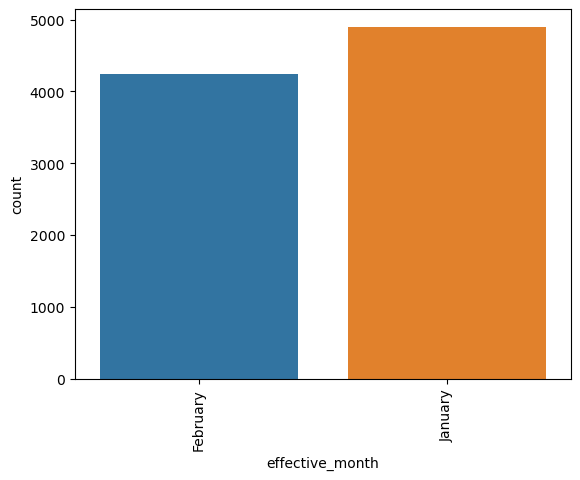

In [26]:
# Plotting effective_month column
sns.countplot(x=categoricals['effective_month'])
plt.xticks(rotation=90)
plt.show()

----------------------------------------------------------------------------------------------
Our effective_month column can be more valuable for our analysis than effective_to_date. Because it will give a better insight of what months had more activity, for example.

---------------------------------------------------------------------------------------------